# Obesity Risk Multi-Classifier Project
## 비만도 예측

#### feature (16개)
- Gender: 성별
- Age: 나이
- Height: 키
- Weight: 몸무게
- family history with overweight: 가족력에 따른 과체중
- FAVC: 고열량 음식 섭취 여부
- FCVC: 야채 섭취 빈도
- NCP: 식사 빈도
- CAEC: 식사 외 음식 섭취 빈도
- SMOKE: 흡연 여부
- CH2O: 수분 섭취 빈도
- SCC: 칼로리 소비 모니터링 여부
- FAF: 활동 빈도
- TUE: 전자기기 사용 빈도
- CALC:알코올 섭취 빈도
- MTRANS: 주로 사용하는 교통 수단

#### target
- NObeyesdad: 비만도

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# 데이터 세트 호출
o_df = pd.read_csv('./datasets/ObesityDataSet.csv', low_memory=False)

In [4]:
o_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


### Ⅰ. 데이터 탐색

#### 📊 데이터 정보 확인

In [5]:
# 데이터 정보 확인
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### Ⅱ. 데이터 전처리

In [5]:
pre_o_df = o_df.copy()

#### 📊 데이터 결측치

In [7]:
# 결측치 개수 확인
pre_o_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### 📊 불필요한 컬럼 제거

In [6]:
# 불필요한 컬럼 제거
pre_o_df = pre_o_df.drop(labels='id', axis=1)

In [7]:
# 데이터 세트 컬럼명 확인
pre_o_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### 📊 데이터 중복행

In [10]:
# 데이터 중복행 확인
pre_o_df.duplicated().sum()

0

#### 📊 데이터 형변환

In [8]:
# 나이, 키, 몸무게 소수점 제거
pre_o_df['Age'] = pre_o_df['Age'].astype('int16')

In [9]:
pre_o_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


#### 📊 feature 정리

In [10]:
# 사분위 확인
display(pre_o_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.565950,5.630841,14.00,20.000000,22.000000,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [11]:
pre_o_df['Age'].value_counts()

Age
21    3141
18    2486
26    2118
23    1683
25    1665
19    1598
22    1512
20    1074
17     830
24     714
30     652
33     413
31     352
27     347
29     301
37     232
38     227
34     220
16     218
28     167
32     152
40     129
39     120
35      78
41      76
36      63
55      60
43      45
42      26
45      26
47       8
14       5
44       3
15       3
46       2
61       2
50       2
52       2
53       2
51       1
56       1
48       1
49       1
Name: count, dtype: int64

In [12]:
# 회원의 등급 책정을 위한 함수 선언
def get_age(x):
    if x > 11 and x <= 19:
        return 10
    if x > 19 and x <= 29:
        return 20
    if x > 29 and x <= 39:
        return 30
    if x > 39 and x <= 49:
        return 40
    if x > 49 and x <= 59:
        return 50
    if x > 59 and x <= 69:
        return 60
    return 1

In [13]:
# 데이터 프레임에 Age 범위로 변경
pre_o_df['Age'] = pre_o_df['Age'].apply(get_age)
pre_o_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,10,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,10,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,10,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,30,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [14]:
pre_o_df['Age'].value_counts()

Age
20    12722
10     5140
30     2509
40      317
50       68
60        2
Name: count, dtype: int64

In [15]:
# 키와 몸무게를 통해 BMI(비만도) 얻기
pre_o_df['BMI'] = pre_o_df['Weight'] / (pre_o_df['Height'] ** 2)

In [16]:
# 사용이 끝난 데이터 제거
pre_o_df = pre_o_df.drop(labels=['Height', 'Weight'], axis=1)

In [17]:
# 타겟을 임시 변수에 저장
NObeyesdad_column = pre_o_df.pop('NObeyesdad')

# 임시 변수에 저장된 열을 맨 뒤에 삽입
pre_o_df.insert(len(pre_o_df.columns), 'NObeyesdad', NObeyesdad_column)

pre_o_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,Male,20,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,28.259565,Overweight_Level_II
1,Female,10,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,23.422091,Normal_Weight
2,Female,10,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,17.126706,Insufficient_Weight
3,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,44.855798,Obesity_Type_III
4,Male,30,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,25.599151,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,36.587084,Obesity_Type_II
20754,Male,10,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,17.099278,Insufficient_Weight
20755,Male,20,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,31.889841,Obesity_Type_II
20756,Male,30,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,28.899693,Overweight_Level_II


#### 📊 데이터 이상치

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# 수치형 피처 분리
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

features = pre_o_df[columns]

In [20]:
# 표준화 처리 스케일링 모델
std = StandardScaler()

In [21]:
# 표준화 처리
std_features = std.fit_transform(features)

In [22]:
# 새로운 데이터 프레임에 담기
sta_o_df = pd.DataFrame(std_features, columns=features.columns)

In [23]:
# 데이터 프레임의 모양 확인 (행 개수, 열 개수)
print(sta_o_df.shape)

(20758, 6)


In [24]:
columns = features.columns

# 각 피처 별 이상치 개수 확인
for column in columns:
    print(f'{column}: {sta_o_df[~sta_o_df[column].between(-1.96, 1.96)].shape[0]}건')

FCVC: 627건
NCP: 2426건
CH2O: 0건
FAF: 1023건
TUE: 1436건
BMI: 167건


In [25]:
# 각 컬럼의 이상치를 반복문을 사용하여 제거
for column in columns:
    sta_o_df.drop(
        sta_o_df[~sta_o_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
# 남아있는 이상치가 있는지 확인
for column in columns:
    print(f'{column}: {sta_o_df[~sta_o_df[column].between(-1.96, 1.96)].shape[0]}건')

FCVC: 0건
NCP: 0건
CH2O: 0건
FAF: 0건
TUE: 0건
BMI: 0건


In [26]:
sta_o_df

,FCVC,NCP,CH2O,FAF,TUE,BMI
0,-0.836279,0.314684,1.206594,-1.171141,0.597438,-0.237862
1,-0.836279,0.338364,-0.048349,0.021775,0.636513,-0.818331
2,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,-1.573741
3,1.039171,0.338364,-0.584035,0.579896,0.271455,1.753591
4,0.438397,-1.119801,-0.081469,1.176486,0.523111,-0.557096
...,...,...,...,...,...,...
20753,0.888355,0.338364,0.201151,0.416056,-0.697686,0.761393
20754,1.039171,1.756085,-1.691863,1.214691,0.636513,-1.577032
20755,-0.071439,0.338364,-0.048349,0.210303,0.966092,0.197750
20756,0.422594,-1.119801,0.189694,-1.171141,0.593055,-0.161050


In [27]:
# 정상 데이터만 유지한 후 인덱스 초기화
d_o_df = pre_o_df.iloc[sta_o_df.index].reset_index(drop=True)
d_o_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,Male,20,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,28.259565,Overweight_Level_II
1,Female,10,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,23.422091,Normal_Weight
2,Female,10,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,17.126706,Insufficient_Weight
3,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,44.855798,Obesity_Type_III
4,Male,30,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,25.599151,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15698,Male,20,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,36.587084,Obesity_Type_II
15699,Male,10,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,17.099278,Insufficient_Weight
15700,Male,20,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,31.889841,Obesity_Type_II
15701,Male,30,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,28.899693,Overweight_Level_II


#### 📊 타겟 데이터 비중

In [28]:
import numpy as np

In [29]:
# 변경 전 타겟 데이터 비중 확인
be_target = d_o_df['NObeyesdad'].value_counts().reset_index()
be_target

,NObeyesdad,count
0,Obesity_Type_III,3897
1,Obesity_Type_II,2901
2,Normal_Weight,2250
3,Overweight_Level_II,1778
4,Obesity_Type_I,1724
5,Insufficient_Weight,1691
6,Overweight_Level_I,1462


In [30]:
# 등급 비율, 언더 샘플링을 통해 비중 맞추기
NObeyesdad1 = d_o_df[d_o_df.NObeyesdad == 'Obesity_Type_III'].sample(1462, random_state=124)
NObeyesdad2 = d_o_df[d_o_df.NObeyesdad == 'Obesity_Type_II'].sample(1462, random_state=124)
NObeyesdad3 = d_o_df[d_o_df.NObeyesdad == 'Normal_Weight'].sample(1462, random_state=124)
NObeyesdad4 = d_o_df[d_o_df.NObeyesdad == 'Overweight_Level_II'].sample(1462, random_state=124)
NObeyesdad5 = d_o_df[d_o_df.NObeyesdad == 'Obesity_Type_I'].sample(1462, random_state=124)
NObeyesdad6 = d_o_df[d_o_df.NObeyesdad == 'Insufficient_Weight'].sample(1462, random_state=124)
NObeyesdad7 = d_o_df[d_o_df.NObeyesdad == 'Overweight_Level_I']
d_o_df = pd.concat([NObeyesdad1, NObeyesdad2, NObeyesdad3, NObeyesdad4, NObeyesdad5, NObeyesdad6, NObeyesdad7]).reset_index(drop=True)

In [31]:
# 변경 후 타겟 데이터 비중 확인
af_target = d_o_df['NObeyesdad'].value_counts().reset_index()
af_target

,NObeyesdad,count
0,Obesity_Type_III,1462
1,Obesity_Type_II,1462
2,Normal_Weight,1462
3,Overweight_Level_II,1462
4,Obesity_Type_I,1462
5,Insufficient_Weight,1462
6,Overweight_Level_I,1462


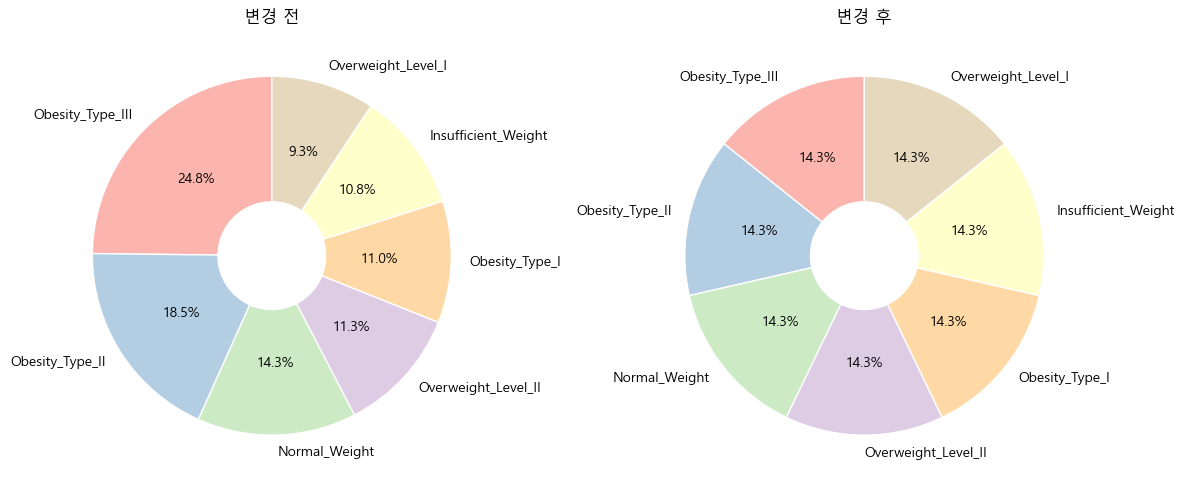

In [35]:
# 타겟 데이터 비중 변경 전/후 차이 그래프 확인
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

b_counts = be_target['count']
b_labels = be_target['NObeyesdad']
a_counts = af_target['count']
a_labels = af_target['NObeyesdad']

# 그래프 그리기
axes[0].pie(b_counts, labels=b_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('변경 전')
axes[1].pie(a_counts, labels=a_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[1].set_title('변경 후')

plt.tight_layout()
plt.show()

#### 📊 문자열 데이터 형변환

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
enc_o_df = d_o_df.copy()
enc_o_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,2.816052,no,0.045246,0.543960,Sometimes,Public_Transportation,40.433999,Obesity_Type_III
1,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,1.313834,no,0.085119,0.540812,Sometimes,Public_Transportation,39.743171,Obesity_Type_III
2,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,1.436616,no,0.067329,0.462973,Sometimes,Public_Transportation,39.119870,Obesity_Type_III
3,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,2.554007,no,0.000000,0.573958,Sometimes,Public_Transportation,41.167575,Obesity_Type_III
4,Female,20,yes,yes,3.000000,3.000000,Sometimes,no,1.746197,no,1.463610,0.444532,Sometimes,Public_Transportation,36.490993,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,Female,20,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,25.390625,Overweight_Level_I
10230,Female,30,no,yes,2.244654,3.000000,Sometimes,no,1.551266,no,0.271174,0.646514,Sometimes,Automobile,20.524105,Overweight_Level_I
10231,Male,10,yes,no,3.000000,3.000000,Sometimes,no,3.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,26.234568,Overweight_Level_I
10232,Male,20,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,28.026591,Overweight_Level_I


In [34]:
gender_encoder = LabelEncoder()
gender = gender_encoder.fit_transform(enc_o_df['Gender'].tolist())
enc_o_df['Gender'] = gender

age_encoder = LabelEncoder()
age = age_encoder.fit_transform(enc_o_df['Age'].tolist())
enc_o_df['Age'] = age

family_encoder = LabelEncoder()
family = family_encoder.fit_transform(enc_o_df['family_history_with_overweight'].tolist())
enc_o_df['family_history_with_overweight'] = family

favc_encoder = LabelEncoder()
favc = favc_encoder.fit_transform(enc_o_df['FAVC'].tolist())
enc_o_df['FAVC'] = favc

caec_encoder = LabelEncoder()
caec = caec_encoder.fit_transform(enc_o_df['CAEC'].tolist())
enc_o_df['CAEC'] = caec

smoke_encoder = LabelEncoder()
smoke = smoke_encoder.fit_transform(enc_o_df['SMOKE'].tolist())
enc_o_df['SMOKE'] = smoke

scc_encoder = LabelEncoder()
scc = scc_encoder.fit_transform(enc_o_df['SCC'].tolist())
enc_o_df['SCC'] = scc

calc_encoder = LabelEncoder()
calc = calc_encoder.fit_transform(enc_o_df['CALC'].tolist())
enc_o_df['CALC'] = calc

mtrans_encoder = LabelEncoder()
mtrans = mtrans_encoder.fit_transform(enc_o_df['MTRANS'].tolist())
enc_o_df['MTRANS'] = mtrans

nobeyesdad_encoder = LabelEncoder()
nobeyesdad = nobeyesdad_encoder.fit_transform(enc_o_df['NObeyesdad'].tolist())
enc_o_df['NObeyesdad'] = nobeyesdad

In [35]:
nobeyesdad_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype='<U19')

In [36]:
# 정수로 인코딩된 데이를 원래의 데이터 값으로 다시 형변환
nobeyesdad_encoder.inverse_transform(enc_o_df['NObeyesdad'])

array(['Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III', ...,
       'Overweight_Level_I', 'Overweight_Level_I', 'Overweight_Level_I'],
      dtype='<U19')

#### 📊 데이터 상관관계

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation')

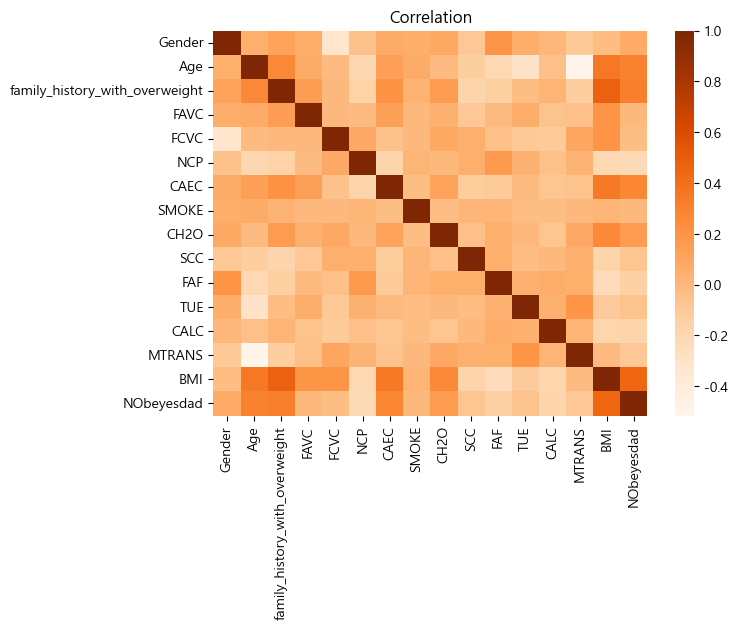

In [42]:
# 상관관계의 지수 확인
corr = enc_o_df.corr()

# 그래프 사이즈 조절
fig = plt.figure(figsize=(7, 5))

# 상관관계 히트맵으로 확인
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [43]:
# 피처와 타겟의 상관관계 값을 확인
corr[['NObeyesdad']].sort_values(by="NObeyesdad", ascending=False)[1:]

,NObeyesdad
BMI,0.443100
family_history_with_overweight,0.314862
Age,0.298372
CAEC,0.276151
CH2O,0.154873
Gender,0.071774
FAVC,-0.004419
SMOKE,-0.005469
FCVC,-0.034801
TUE,-0.062157


#### 📌 시사점
- 비만도는 체질량지수(BMI), 가족력에 따른 과체중과 가장 밀접한 관계가 있다고 나타남.
- 그 외에 나이, 식사 외 음식 섭취 빈도(CAEC), 식사 빈도(NCP)도 밀접한 관계가 있다고 나타남.

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>, <Axes: title={'center': 'FAF'}>,
        <Axes: title={'center': 'TUE'}>],
       [<Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'NObeyesdad'}>]], dtype=object)

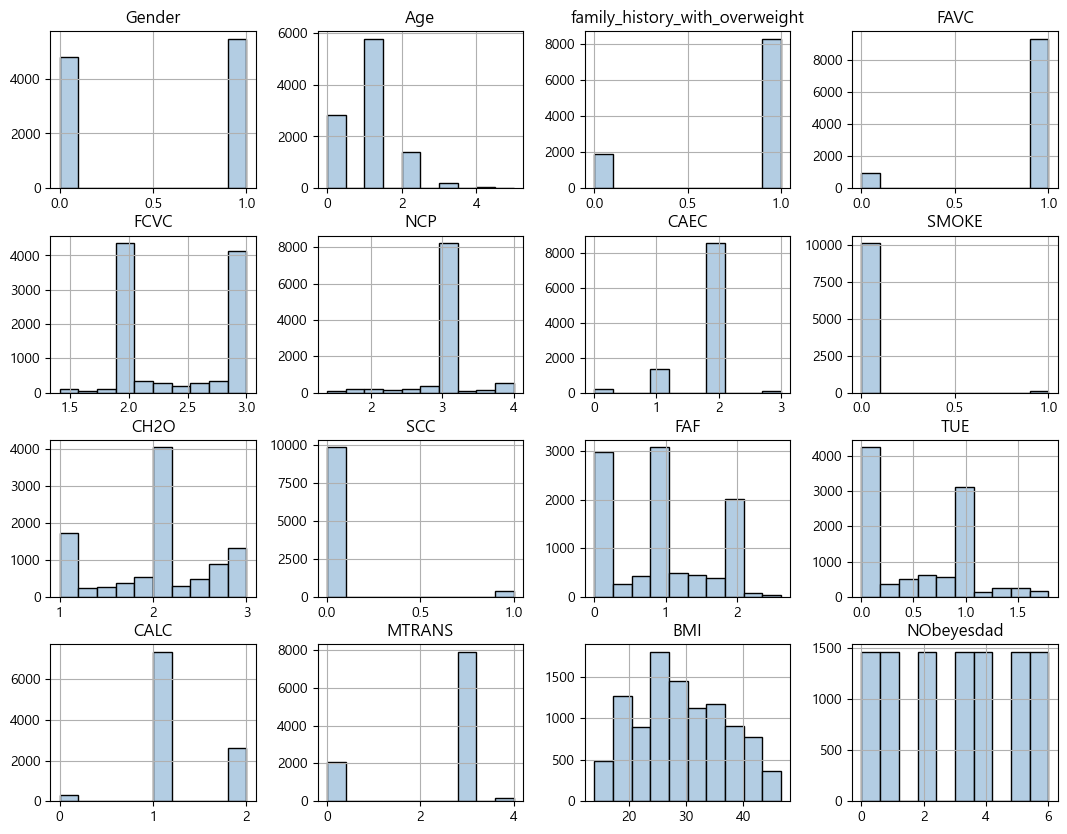

In [44]:
enc_o_df.hist(figsize=(13, 10), color=cmap(np.array([1])), edgecolor='black')

#### 📌 시사점
**수치형 데이터: 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'**

- 수치형 데이터들의 분포가 고르지 못하기 때문에 로그 변환이 필요하다고 판단됨.

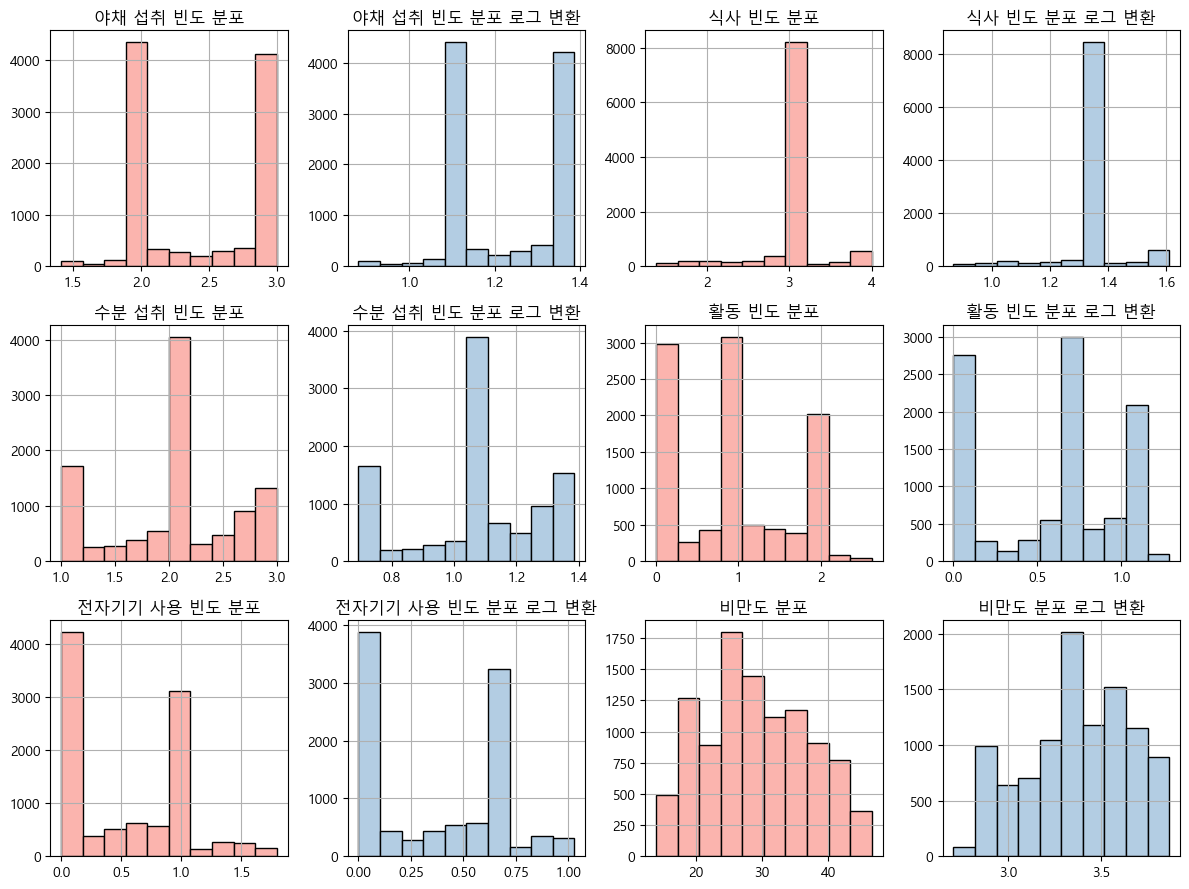

In [45]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

axes[0][0].hist(enc_o_df.FCVC, color=cmap(np.array([0])), edgecolor='black')
axes[0][0].grid(True)
axes[0][0].set_title('야채 섭취 빈도 분포')
axes[0][1].hist(np.log1p(enc_o_df.FCVC), color=cmap(np.array([1])), edgecolor='black')
axes[0][1].grid(True)
axes[0][1].set_title('야채 섭취 빈도 분포 로그 변환')
axes[0][2].hist(enc_o_df.NCP, color=cmap(np.array([0])), edgecolor='black')
axes[0][2].grid(True)
axes[0][2].set_title('식사 빈도 분포')
axes[0][3].hist(np.log1p(enc_o_df.NCP), color=cmap(np.array([1])), edgecolor='black')
axes[0][3].grid(True)
axes[0][3].set_title('식사 빈도 분포 로그 변환')

axes[1][0].hist(enc_o_df.CH2O, color=cmap(np.array([0])), edgecolor='black')
axes[1][0].grid(True)
axes[1][0].set_title('수분 섭취 빈도 분포')
axes[1][1].hist(np.log1p(enc_o_df.CH2O), color=cmap(np.array([1])), edgecolor='black')
axes[1][1].grid(True)
axes[1][1].set_title('수분 섭취 빈도 분포 로그 변환')
axes[1][2].hist(enc_o_df.FAF, color=cmap(np.array([0])), edgecolor='black')
axes[1][2].grid(True)
axes[1][2].set_title('활동 빈도 분포')
axes[1][3].hist(np.log1p(enc_o_df.FAF), color=cmap(np.array([1])), edgecolor='black')
axes[1][3].grid(True)
axes[1][3].set_title('활동 빈도 분포 로그 변환')

axes[2][0].hist(enc_o_df.TUE, color=cmap(np.array([0])), edgecolor='black')
axes[2][0].grid(True)
axes[2][0].set_title('전자기기 사용 빈도 분포')
axes[2][1].hist(np.log1p(enc_o_df.TUE), color=cmap(np.array([1])), edgecolor='black')
axes[2][1].grid(True)
axes[2][1].set_title('전자기기 사용 빈도 분포 로그 변환')
axes[2][2].hist(enc_o_df.BMI, color=cmap(np.array([0])), edgecolor='black')
axes[2][2].grid(True)
axes[2][2].set_title('비만도 분포')
axes[2][3].hist(np.log1p(enc_o_df.BMI), color=cmap(np.array([1])), edgecolor='black')
axes[2][3].grid(True)
axes[2][3].set_title('비만도 분포 로그 변환')
plt.tight_layout()
plt.show()

#### 📌 결과
- 수치형 데이터의 로그 변환을 진행했지만, 기대를 충족하지 못햇으므로 별도의 로그 변환은 진행하지 않기로 함.

In [46]:
# # 로그 변환
# columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# for column in columns:
#     enc_o_df[column] = np.log1p(enc_o_df[column])

### Ⅲ. 데이터 세트 분리

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [38]:
enc_o_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,0,1,1,1,3.000000,3.000000,2,0,2.816052,0,0.045246,0.543960,1,3,40.433999,4
1,0,1,1,1,3.000000,3.000000,2,0,1.313834,0,0.085119,0.540812,1,3,39.743171,4
2,0,1,1,1,3.000000,3.000000,2,0,1.436616,0,0.067329,0.462973,1,3,39.119870,4
3,0,1,1,1,3.000000,3.000000,2,0,2.554007,0,0.000000,0.573958,1,3,41.167575,4
4,0,1,1,1,3.000000,3.000000,2,0,1.746197,0,1.463610,0.444532,1,3,36.490993,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,0,1,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,1,3,25.390625,5
10230,0,2,0,1,2.244654,3.000000,2,0,1.551266,0,0.271174,0.646514,1,0,20.524105,5
10231,1,0,1,0,3.000000,3.000000,2,0,3.000000,0,2.000000,1.000000,1,3,26.234568,5
10232,1,1,1,0,2.000000,3.000000,2,0,2.000000,0,1.000000,0.000000,1,3,28.026591,5


#### 📊 데이터 세트 분리

In [39]:
# 피처, 타겟 데이터 분리
features, targets = enc_o_df.iloc[:, :-1], enc_o_df.iloc[:, -1]

In [40]:
# 문제/정답 및 학습/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

### Ⅳ. 데이터 훈련

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### 💡 DTC

In [52]:
dtc =  DecisionTreeClassifier()

In [53]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

#### 📊 DTC 오차행렬

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [55]:
prediction = dtc.predict(X_test)

오차 행렬
[[255  34   0   0   0   3   0]
 [ 37 219   0   0   0  25  12]
 [  1   2 224  18   1  11  35]
 [  0   0  15 276   0   0   1]
 [  0   0   0   0 293   0   0]
 [  2  33  15   1   1 190  50]
 [  0   6  41   5   0  55 186]]
정확도: 0.8026, 정밀도: 0.8008, 재현율: 0.8027, F1: 0.8017
################################################################################


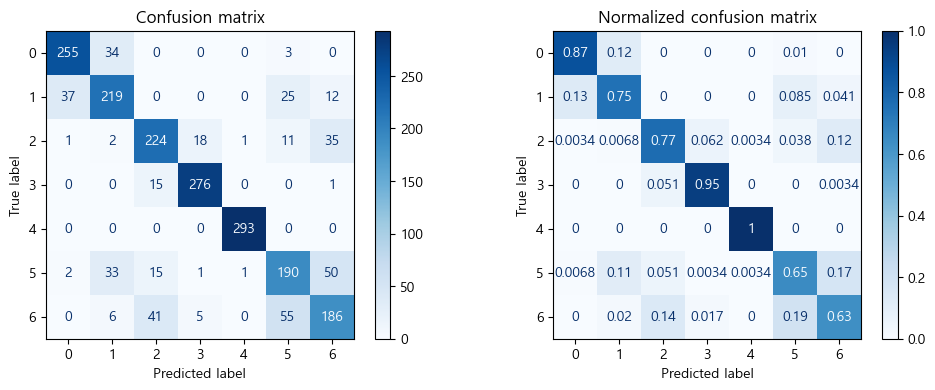

In [56]:
get_evaluation(y_test, prediction, dtc, X_test)

#### 📊 의사결정 트리

In [57]:
from sklearn.tree import export_graphviz
import graphviz

In [58]:
class_names = targets.unique().astype(str).tolist()
feature_names = features.columns.tolist()

In [59]:
# # Decision Tree 모델 시각화하기 위한 Graphviz dot 포맷으로 변환
# # 시각화 모델 지정, 출력 파일 경로 및 이름 지정, 타겟 클래스 이름 설정, 특성 이름 설정, 노드 불순도 표시 여부, 노드 색을 불순도에 따라 채울지 여부
# export_graphviz(
#     dtc,
#     out_file='./images/obesity_dtc01.dot',
#     class_names=class_names,
#     feature_names=feature_names,
#     impurity=True,
#     filled=True
# )

In [60]:
# # with문으로 파일을 열거나 또는 다른 리소스 사용(사용 후 닫음)
# # 해당 경로에 있는 dot파일을 열고 f에 담기
# with open('./images/obesity_dtc01.dot') as f:
#     obesity_dtc01 = f.read()
    
# # 파일의 내용을 그래프 객체로 변환
# obesity_dtc01_graph = graphviz.Source(obesity_dtc01)

In [61]:
# # 그래프 객체 이미지 파일로 랜더링
# obesity_dtc01_graph.render(filename='obesity_dtc01', directory='./images', format='png')

<img src="./images/obesity_dtc01.png">

#### 📌 결과
- 최소 샘플수가 0~5 사이일 때 지니 개수가 0개가 되며 과적합이 일어나는 것을 확인함.

#### 📊 Feature 별 중요도

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# zip함수로 두개의 리스트를 묶기
# name(피처 명)과 value(중요도)에 하나씩 값을 반복하여 담기
for name, value in zip(feature_names, dtc.feature_importances_):
    # 피처명의 중요도를 백분율로 표현하여 출력
    print(f'{name}: {round(value * 100, 2)}%')

Gender: 4.01%
Age: 2.38%
family_history_with_overweight: 0.88%
FAVC: 0.9%
FCVC: 16.07%
NCP: 2.51%
CAEC: 1.05%
SMOKE: 0.14%
CH2O: 3.17%
SCC: 0.48%
FAF: 2.72%
TUE: 2.51%
CALC: 1.88%
MTRANS: 1.11%
BMI: 60.2%


C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

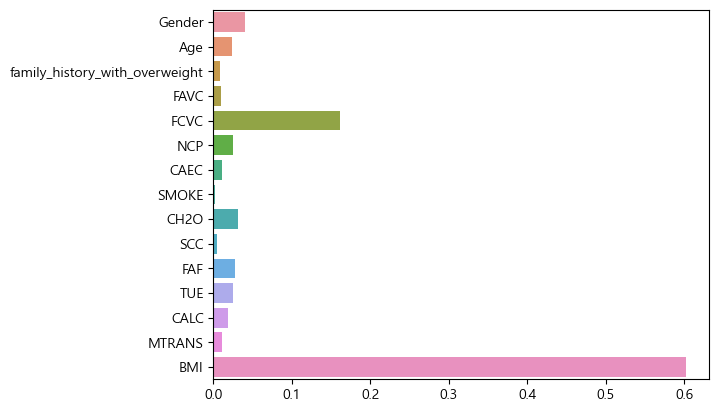

In [64]:
# 각 피처 별 중요도를 바 그래프로 표현하기
sns.barplot(x=dtc.feature_importances_, y=feature_names)

#### 📌 결과
- BMI(체질량지수)와 FCVC(야채 섭취 빈도)의 중요도가 가장 높게 나타남.

#### 📊 Feature 별 중요도를 통한 과적합 확인

In [65]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [66]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features, targets = enc_o_df.iloc[:, [4, 14]], enc_o_df.iloc[:, -1]
features

,FCVC,BMI
0,3.000000,40.433999
1,3.000000,39.743171
2,3.000000,39.119870
3,3.000000,41.167575
4,3.000000,36.490993
...,...,...
10229,2.000000,25.390625
10230,2.244654,20.524105
10231,3.000000,26.234568
10232,2.000000,28.026591


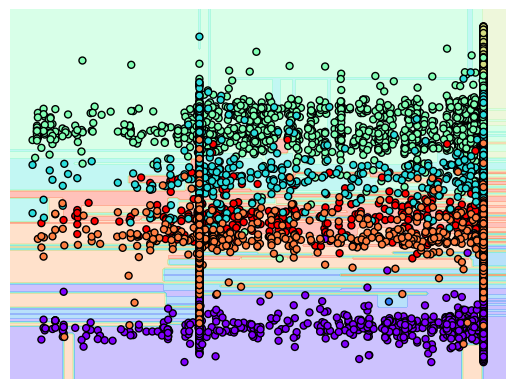

In [67]:
# 데이터 학습
dtc.fit(features, targets)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features, targets)

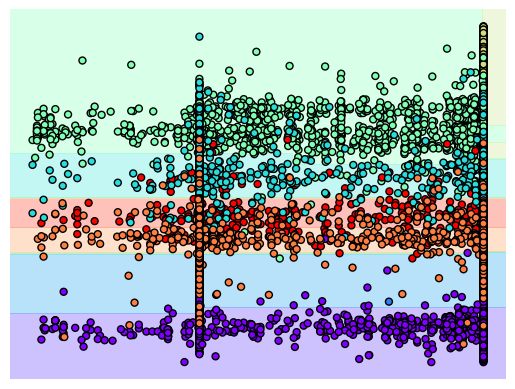

In [68]:
# 결정 트리의 무작위성을 제어하고 분류 모델 담기
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=35)

# 데이터 학습
dtc.fit(features, targets)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features, targets)

#### 📌 결과
- 최소 샘플수가 약 35개 정도여야 overfitting(과적합)이 해소됨.

### 💡 DTC, GirdShearchCV

In [69]:
# Decision Tree분류 모델 dtc에 담기
g_dtc = DecisionTreeClassifier()

In [70]:
# 파라미터 값 설정
parameters = {'max_depth': [10, 20], 'min_samples_split': [30, 35, 40, 45, 50]}

In [71]:
# 교차 검증 설정하기
# cv는 3, 4, 5 중에 하나 사용(느리면 3~4 중에 사용)
g_dtc = GridSearchCV(g_dtc, param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [72]:
# 데이터 학습 및 교차검증 진행
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'min_samples_split': [30, 35, 40, 45, 50]},
             return_train_score=True)

In [73]:
# 그리드 서치를 통해 얻은 결과 데이터 프레임으로 변환하여 해당하는 컬럼들만 보기
g_dtc_result = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
g_dtc_result

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 10, 'min_samples_split': 30}",0.842311,4,0.840601,0.842433,0.843899
1,"{'max_depth': 10, 'min_samples_split': 35}",0.843288,1,0.842433,0.843899,0.843532
2,"{'max_depth': 10, 'min_samples_split': 40}",0.842922,2,0.844632,0.843899,0.840235
3,"{'max_depth': 10, 'min_samples_split': 45}",0.842433,3,0.846830,0.840235,0.840235
4,"{'max_depth': 10, 'min_samples_split': 50}",0.840967,5,0.842433,0.840235,0.840235
5,"{'max_depth': 20, 'min_samples_split': 30}",0.833272,10,0.829241,0.834372,0.836204
6,"{'max_depth': 20, 'min_samples_split': 35}",0.835227,9,0.834738,0.835837,0.835104
7,"{'max_depth': 20, 'min_samples_split': 40}",0.836326,7,0.838036,0.837303,0.833639
8,"{'max_depth': 20, 'min_samples_split': 45}",0.836937,6,0.840235,0.835471,0.835104
9,"{'max_depth': 20, 'min_samples_split': 50}",0.835593,8,0.836570,0.834738,0.835471


In [74]:
# 그리드 서치를 통해 얻은 최적의 학습 모델 담기
g_dtc = g_dtc.best_estimator_

In [75]:
prediction = g_dtc.predict(X_test)

오차 행렬
[[269  23   0   0   0   0   0]
 [ 35 239   0   0   0  16   3]
 [  1   1 250  12   0   7  21]
 [  0   0  17 274   0   1   0]
 [  0   0   1   0 292   0   0]
 [  2  26  10   0   1 191  62]
 [  0   5  34   0   0  38 216]]
정확도: 0.8456, 정밀도: 0.8450, 재현율: 0.8456, F1: 0.8446
################################################################################


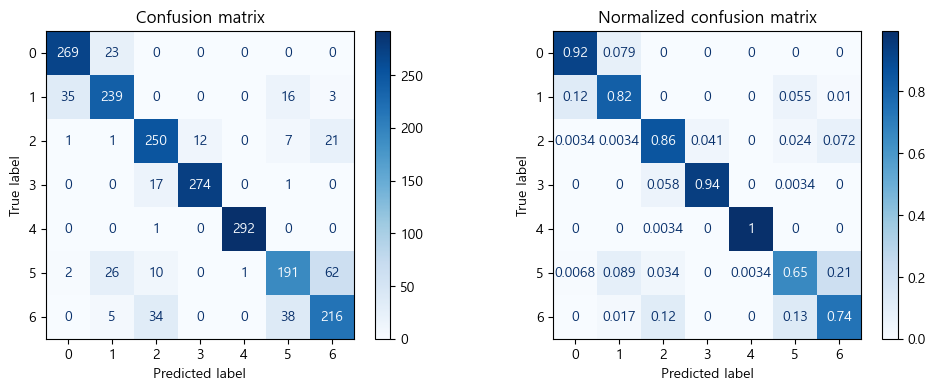

In [76]:
get_evaluation(y_test, prediction, g_dtc, X_test)

#### 📌 결과
- 하이퍼파라미터 값 조정 후 정확도가 더 상승한 것을 확인함.

### 💡 SVC

In [55]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### 📊 1차 조정

In [78]:
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear', 'rbf']}

In [79]:
svc = SVC(probability=True)

In [80]:
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

#### 📊 1차 훈련

In [81]:
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [82]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.652741,45
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.404795,60
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.652741,45
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.410537,59
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.652741,45
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.675216,43
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.842921,16
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.515693,55
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.842921,16


In [83]:
svc_result_df[svc_result_df['rank_test_score'] == 1]

,params,mean_test_score,rank_test_score
51,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.847319,1


In [84]:
svc_result_df['params'][51]

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

#### 📊 2차 조정

In [85]:
svc = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

#### 📊 2차 훈련

In [86]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.01, probability=True))])

#### 📊 예측

In [87]:
prediction = svc_pipe.predict(X_test)

#### 📊 평가

오차 행렬
[[276  15   0   0   0   1   0]
 [ 38 219   0   0   0  35   1]
 [  1   1 226  24   1  10  29]
 [  0   0   9 282   0   1   0]
 [  0   0   0   0 293   0   0]
 [  2  22  12   0   0 211  45]
 [  0   2  21   1   1  51 217]]
정확도: 0.8422, 정밀도: 0.8425, 재현율: 0.8422, F1: 0.8413
################################################################################


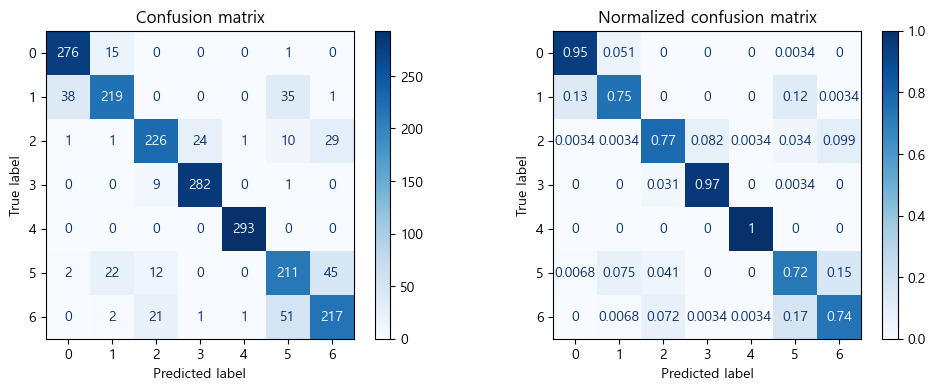

In [88]:
get_evaluation(y_test, prediction, svc_pipe, X_test)

### 💡 KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

#### 📊 1차 조정

In [91]:
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

In [92]:
knn = KNeighborsClassifier()

In [93]:
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

#### 📊 1차 훈련

In [94]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [95]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.692561,5
1,{'knn__n_neighbors': 5},0.698179,4
2,{'knn__n_neighbors': 7},0.699401,3
3,{'knn__n_neighbors': 9},0.703920,2
4,{'knn__n_neighbors': 11},0.705140,1


#### 📊 2차 조정

In [96]:
knn = KNeighborsClassifier(n_neighbors=11)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

#### 📊 2차 훈련

In [97]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

#### 📊 예측

In [98]:
prediction = knn_pipe.predict(X_test)

#### 📊 평가

오차 행렬
[[233  48   0   0   0   6   5]
 [ 66 162  10   4   0  34  17]
 [  4   9 180  30   4  20  45]
 [  0   0  11 272   0   1   8]
 [  0   1   0   0 292   0   0]
 [ 21  51  26  10   1 143  40]
 [  7  28  40  12   0  40 166]]
정확도: 0.7074, 정밀도: 0.7013, 재현율: 0.7074, F1: 0.7026
################################################################################


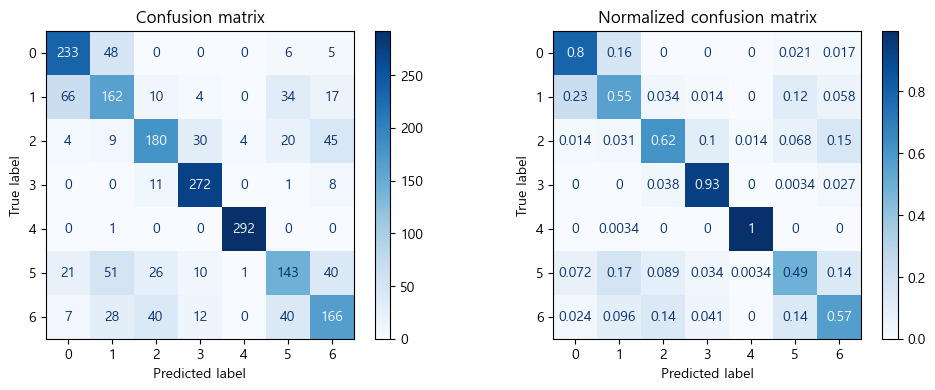

In [99]:
get_evaluation(y_test, prediction, knn_pipe, X_test)

#### 📌 결과
- DTC, SVC, KNN 중 DTC의 성능이 SVC와 아주 근소한 차이로 가장 높게 나타났으며, KNN의 성능은 매우 열세함.

### 💡 hard voting

In [101]:
from sklearn.ensemble import VotingClassifier

#### 📊 조정

In [107]:
ha_vc = VotingClassifier(estimators=[('dtc', g_dtc), 
                             ('svc', svc_pipe), 
                             ('knn', knn_pipe)], 
                      voting='hard', 
                 n_jobs=-1)

#### 📊 훈련

In [108]:
ha_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_split=35)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=10, gamma=0.01,
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=11))]))],
                 n_jobs=-1)

#### 📊 예측

In [109]:
prediction = ha_vc.predict(X_test)

#### 📊 평가

오차 행렬
[[276  16   0   0   0   0   0]
 [ 46 227   0   0   0  19   1]
 [  1   1 237  19   1   8  25]
 [  0   0  10 281   0   1   0]
 [  0   0   0   0 293   0   0]
 [  4  35  18   0   0 193  42]
 [  3   7  28   1   0  40 214]]
정확도: 0.8407, 정밀도: 0.8382, 재현율: 0.8408, F1: 0.8386
################################################################################


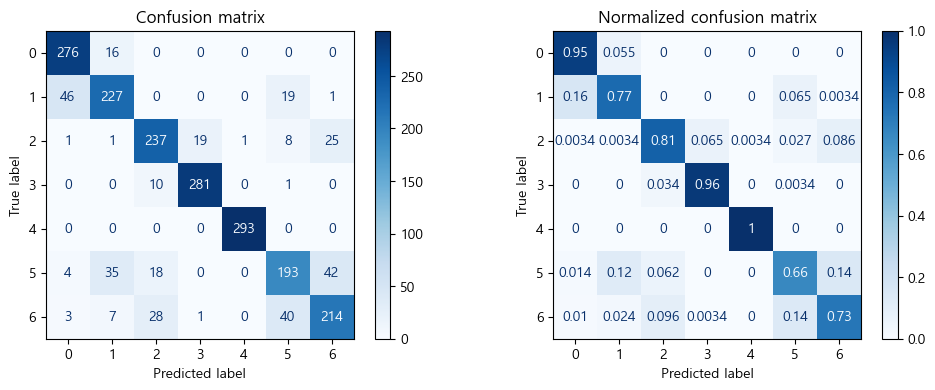

In [110]:
get_evaluation(y_test, prediction, ha_vc, X_test)

### 💡 soft voting

#### 📊 조정

In [113]:
sf_vc = VotingClassifier(estimators=[('dtc', g_dtc), 
                             ('svc', svc_pipe), 
                             ('knn', knn_pipe)], 
                 voting='soft', 
                 n_jobs=-1)

#### 📊 훈련

In [114]:
sf_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_split=35)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=10, gamma=0.01,
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=11))]))],
                 n_jobs=-1, voting='soft')

#### 📊 예측

In [115]:
prediction = sf_vc.predict(X_test)

#### 📊 평가

오차 행렬
[[276  15   0   0   0   1   0]
 [ 39 235   0   0   0  17   2]
 [  1   1 237  19   1   9  24]
 [  0   0   8 282   0   0   2]
 [  0   0   0   0 293   0   0]
 [  2  20  11   0   1 212  46]
 [  0   3  27   1   0  37 225]]
정확도: 0.8598, 정밀도: 0.8587, 재현율: 0.8598, F1: 0.8587
################################################################################


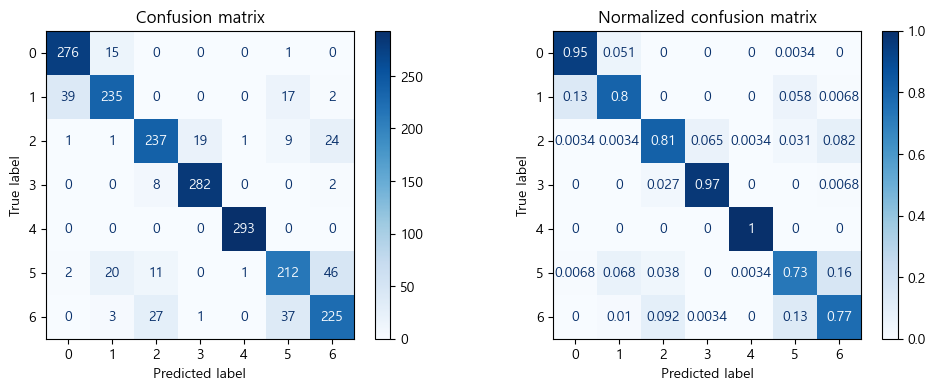

In [116]:
get_evaluation(y_test, prediction, sf_vc, X_test)

#### 📌 결과
- 하드 보팅 보다 소프트 보팅 성능이 더 우세한 것으로 나타남.
- 하드 보팅 방식 진행이 단일 모델 학습(DTC, SVC)보다 성능이 떨어지는 것으로 나타나는데, knn 성능이 열세한 것과 연관이 있다 판단됨.

### 💡 Bagging - 랜덤 포레스트(Random Forest)

In [43]:
from sklearn.ensemble import RandomForestClassifier

#### 📊 1차 조정

In [44]:
# 파라미터 값 설정
parameters = {'max_depth': [10, 20], 'min_samples_split': [30, 35, 40, 45, 50]}

In [45]:
# 랜덤포레스트 분류기 담기
# n_estimators: 생성할 모델 개수 작성
rfc = RandomForestClassifier(n_estimators=100)

In [46]:
# 학습 및 교차 검증 모델 설정
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

#### 📊 1차 훈련

In [47]:
# 데이터 훈련
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'min_samples_split': [30, 35, 40, 45, 50]})

In [48]:
# 훈련된 모델 확인
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 30}",0.867229,4
1,"{'max_depth': 10, 'min_samples_split': 35}",0.867229,5
2,"{'max_depth': 10, 'min_samples_split': 40}",0.864786,8
3,"{'max_depth': 10, 'min_samples_split': 45}",0.865642,7
4,"{'max_depth': 10, 'min_samples_split': 50}",0.864664,9
5,"{'max_depth': 20, 'min_samples_split': 30}",0.870037,1
6,"{'max_depth': 20, 'min_samples_split': 35}",0.868206,3
7,"{'max_depth': 20, 'min_samples_split': 40}",0.869061,2
8,"{'max_depth': 20, 'min_samples_split': 45}",0.867106,6
9,"{'max_depth': 20, 'min_samples_split': 50}",0.864175,10


#### 📊 예측

In [49]:
# 최적의 모델 담기
rfc = g_rfc.best_estimator_

In [50]:
# 예측
prediction = rfc.predict(X_test)

#### 📊 평가

오차 행렬
[[281  11   0   0   0   0   0]
 [ 30 250   0   0   0  12   1]
 [  1   1 249  11   1  11  18]
 [  0   0  12 279   0   0   1]
 [  0   0   1   0 292   0   0]
 [  2  21   7   0   0 214  48]
 [  0   3  29   0   0  40 221]]
정확도: 0.8725, 정밀도: 0.8715, 재현율: 0.8725, F1: 0.8717
################################################################################


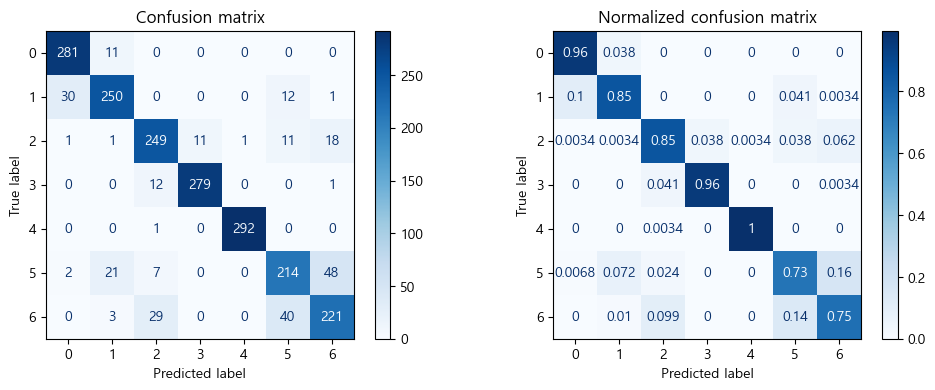

In [51]:
get_evaluation(y_test, prediction, rfc, X_test)

#### 📌 결과
- 보팅 학습 보다 배깅 학습이 더 성능이 우세한 것으로 나타남.

#### 📊 2차 조정 (StandardScaler)

In [56]:
# 파라미터 값 설정
parameters = {
    'rfc__max_depth': [10, 20], 
    'rfc__min_samples_split': [30, 35, 40, 45, 50]
}

In [57]:
# 랜덤포레스트 분류기 담기
g_rfc = RandomForestClassifier(n_estimators=100)

In [58]:
# StandardScaler 사용
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', g_rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

#### 📊 2차 훈련

In [59]:
#훈련
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20],
                         'rfc__min_samples_split': [30, 35, 40, 45, 50]})

In [60]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.865397,8
1,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.865886,7
2,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.864908,9
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.867352,5
4,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.863808,10
5,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.869184,3
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.870404,1
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.867840,4
8,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.866372,6
9,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.870160,2


#### 📊 예측

In [61]:
# 최적의 모델 담기
g_rfc = g_rfc.best_estimator_
# 예측
prediction = g_rfc.predict(X_test)

#### 📊 평가

오차 행렬
[[281  11   0   0   0   0   0]
 [ 27 252   0   0   0  12   2]
 [  1   1 246  13   1  12  18]
 [  0   0  11 280   0   0   1]
 [  0   0   1   0 292   0   0]
 [  2  22   6   0   0 215  47]
 [  0   3  27   0   0  37 226]]
정확도: 0.8754, 정밀도: 0.8744, 재현율: 0.8754, F1: 0.8747
################################################################################


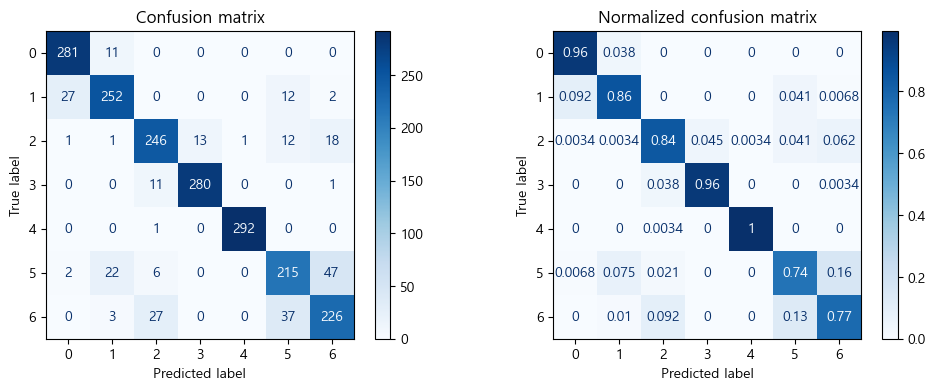

In [62]:
# 오차행렬
get_evaluation(y_test, prediction, g_rfc, X_test)

#### 📌 결과
- 표준화하여 재학습한 결과 기존보다 근소하게 성능이 상승한 것을 확인함.

#### 📊 3차 조정 (MinMaxScaler)

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
# 파라미터 값 설정
parameters = {
    'rfc__max_depth': [10, 20], 
    'rfc__min_samples_split': [30, 35, 40, 45, 50]
}

In [170]:
# 랜덤포레스트 분류기 담기
m_rfc = RandomForestClassifier(n_estimators=100)

In [171]:
# 서로 다른 단위의 피처를 비교하기 위해 MinMaxScaler 사용
rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', m_rfc)])
m_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

#### 📊 3차 훈련

In [172]:
#훈련
m_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20],
                         'rfc__min_samples_split': [30, 35, 40, 45, 50]})

In [174]:
result_df = pd.DataFrame(m_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.867351,5
1,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.870405,2
2,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.865276,8
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.864174,10
4,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.866129,7
5,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.871138,1
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.868939,3
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.867595,4
8,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.866497,6
9,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.865153,9


#### 📊 예측

In [175]:
# 최적의 모델 담기
m_rfc = m_rfc.best_estimator_
# 예측
prediction = m_rfc.predict(X_test)

#### 📊 평가

오차 행렬
[[279  13   0   0   0   0   0]
 [ 29 252   0   0   0  10   2]
 [  1   2 245  12   1  11  20]
 [  0   0  11 280   0   0   1]
 [  0   0   1   0 292   0   0]
 [  2  21   5   0   0 215  49]
 [  0   4  26   0   0  44 219]]
정확도: 0.8705, 정밀도: 0.8695, 재현율: 0.8705, F1: 0.8699
################################################################################


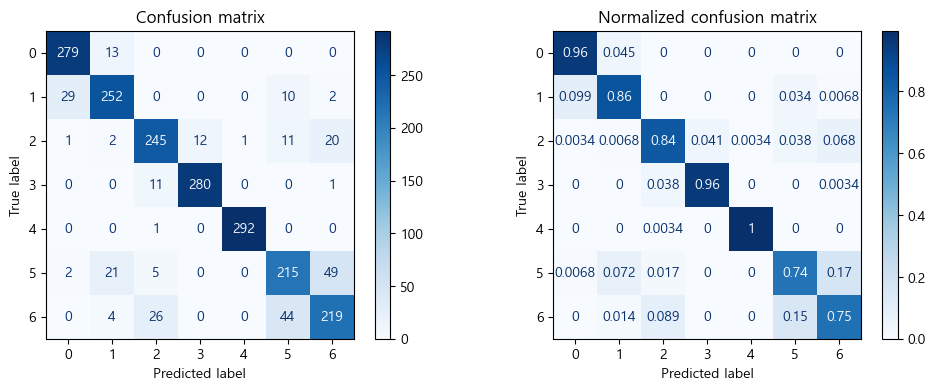

In [176]:
# 오차행렬
get_evaluation(y_test, prediction, m_rfc, X_test)

#### 📌 결과
- 다른 단위의 feature의 비교가 가능하도록 조정했지만, 오히려 성능이 하락함.
- MinMaxScaler 보다 StandardScaler이 더 우세한 것을 확인함.

### 💡 Boosting

In [186]:
from sklearn.ensemble import AdaBoostClassifier

#### 📊 1차 조정

In [187]:
# 파라미터 값 설정
parmeters = {
    'estimator': [DecisionTreeClassifier(max_depth=10, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=40),
                 DecisionTreeClassifier(max_depth=20, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=40)],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

In [188]:
# 학습 및 교차 검증 모델 설정
g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parmeters, cv=5, n_jobs=-1)

#### 📊 1차 훈련

In [189]:
# 훈련
g_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=10,
                                                              min_samples_split=30),
                                       DecisionTreeClassifier(max_depth=10,
                                                              min_samples_split=35),
                                       DecisionTreeClassifier(max_depth=10,
                                                              min_samples_split=40),
                                       DecisionTreeClassifier(max_depth=20,
                                                              min_samples_split=30),
                                       DecisionTreeClassifier(max_depth=20,
                                                              min_samples_split=35),
                                       DecisionTreeClassifier(max_depth=20,
                                                              min_samples_split=40)],
                         'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [190]:
# 훈련 결과 중 보고 싶은 컬럼만 추출하여 새로운 데이터 프레임 생성
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,{'estimator': DecisionTreeClassifier(max_depth...,0.857089,70
1,{'estimator': DecisionTreeClassifier(max_depth...,0.860997,55
2,{'estimator': DecisionTreeClassifier(max_depth...,0.860998,54
3,{'estimator': DecisionTreeClassifier(max_depth...,0.860509,58
4,{'estimator': DecisionTreeClassifier(max_depth...,0.864051,34
...,...,...,...
67,{'estimator': DecisionTreeClassifier(max_depth...,0.864419,31
68,{'estimator': DecisionTreeClassifier(max_depth...,0.866739,12
69,{'estimator': DecisionTreeClassifier(max_depth...,0.862586,45
70,{'estimator': DecisionTreeClassifier(max_depth...,0.867350,3


#### 📊 예측

In [191]:
# 최적의 모델 담기
ada = g_ada.best_estimator_
# 예측
prediction = ada.predict(X_test)

#### 📊 평가

오차 행렬
[[280  12   0   0   0   0   0]
 [ 30 247   0   0   0  15   1]
 [  1   1 247  11   1   7  24]
 [  0   0  10 281   0   1   0]
 [  0   0   1   0 292   0   0]
 [  2  18  11   0   0 212  49]
 [  0   5  26   1   0  40 221]]
정확도: 0.8696, 정밀도: 0.8686, 재현율: 0.8696, F1: 0.8688
################################################################################


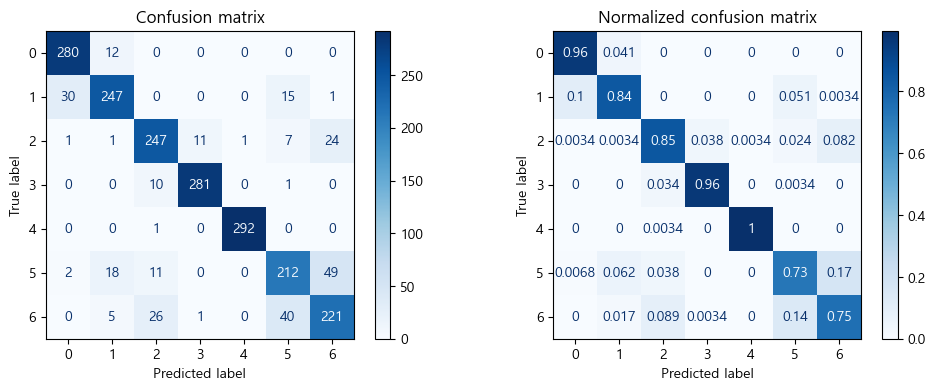

In [192]:
get_evaluation(y_test, prediction, ada, X_test)

#### 📌 결과
- 이전 보다 오히려 성능이 저하된 것을 확인함.
- 때문에 전체 스케일링으로 성능 상승을 기대하고자 함.

#### 📊 2차 조정 (StandardScaler)

In [196]:
# 파라미터 값 설정
parmeters = {
    'ada__estimator': [DecisionTreeClassifier(max_depth=10, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=40),
                 DecisionTreeClassifier(max_depth=20, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=40)],
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

In [197]:
# 파이프 라인을 통해 전처리와 훈련 모델 연결
ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', AdaBoostClassifier())])

# 학습 및 교차 검증 모델 설정
s_ada = GridSearchCV(ada_pipe, param_grid=parmeters, cv=5, n_jobs=-1)

#### 📊 2차 훈련

In [198]:
# 훈련
s_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__estimator': [DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=30),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=35),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=40),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=30),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=35),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=40)],
                         'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

#### 📊 예측

In [199]:
# 최적의 모델 담기
s_ada = s_ada.best_estimator_
# 예측
prediction = s_ada.predict(X_test)

#### 📊 평가

오차 행렬
[[279  13   0   0   0   0   0]
 [ 33 242   0   0   0  17   1]
 [  1   1 247  12   1   5  25]
 [  0   0  10 281   0   1   0]
 [  0   0   1   0 292   0   0]
 [  2  18  10   0   0 214  48]
 [  0   5  26   1   0  39 222]]
정확도: 0.8681, 정밀도: 0.8673, 재현율: 0.8681, F1: 0.8673
################################################################################


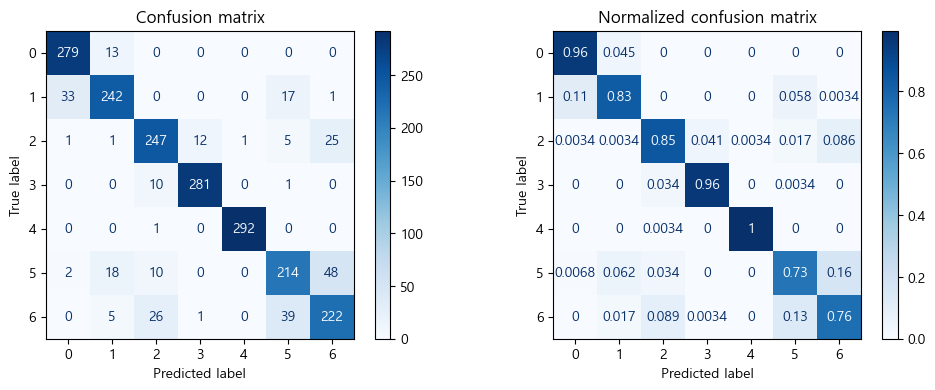

In [200]:
# 오차행렬
get_evaluation(y_test, prediction, s_ada, X_test)

#### 📊 3차 조정 (MinMaxScaler)

In [201]:
# 파라미터 값 설정
parmeters = {
    'ada__estimator': [DecisionTreeClassifier(max_depth=10, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=10, min_samples_split=40),
                 DecisionTreeClassifier(max_depth=20, min_samples_split=30),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=35),
                        DecisionTreeClassifier(max_depth=20, min_samples_split=40)],
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

In [202]:
# 파이프 라인을 통해 전처리와 훈련 모델 연결
ada_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('ada', AdaBoostClassifier())])

# 학습 및 교차 검증 모델 설정
m_ada = GridSearchCV(ada_pipe, param_grid=parmeters, cv=5, n_jobs=-1)

#### 📊 3차 훈련

In [203]:
# 훈련
m_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__estimator': [DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=30),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=35),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   min_samples_split=40),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=30),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=35),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   min_samples_split=40)],
                         'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

#### 📊 예측

In [204]:
# 최적의 파라미터 값 담기
m_ada = m_ada.best_estimator_
# 예측
prediction = m_ada.predict(X_test)

#### 📊 평가

오차 행렬
[[277  15   0   0   0   0   0]
 [ 30 247   0   0   0  15   1]
 [  1   1 242  12   1   8  27]
 [  0   0  10 281   0   1   0]
 [  0   0   0   0 293   0   0]
 [  2  18   9   0   0 211  52]
 [  0   5  26   1   0  40 221]]
정확도: 0.8657, 정밀도: 0.8649, 재현율: 0.8657, F1: 0.8650
################################################################################


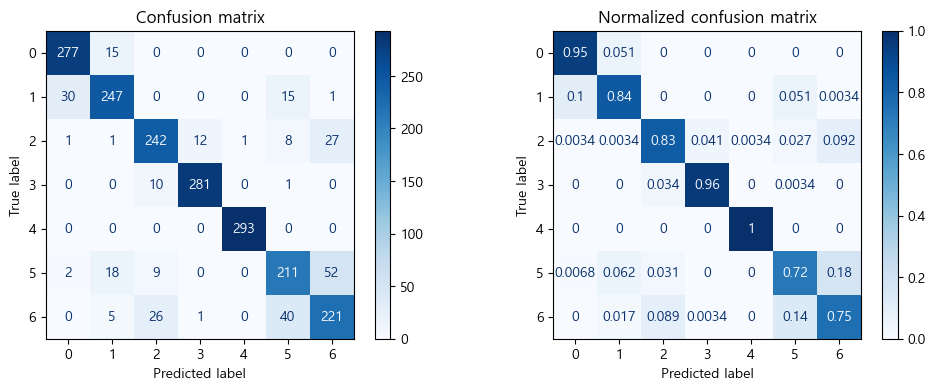

In [205]:
# 오차행렬
get_evaluation(y_test, prediction, m_ada, X_test)

#### 📌 결과
- 전처리 후 오히려 성능이 저하됐으며, 부스팅 학습이 이전 모델 보다 성능이 열세하므로 적합하지 않다고 판단됨.

### 💡 GBM

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

#### 📊 조정

In [208]:
# 파라미터 값 설정
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'max_depth': [10, 20],
    'min_samples_split': [30, 35, 40, 45, 50]
}

In [209]:
# 학습 및 교차 검증 모델 설정
g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3, n_jobs=-1)

#### 📊 학습

In [210]:
# 훈련
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'max_depth': [10, 20],
                         'min_samples_split': [30, 35, 40, 45, 50],
                         'n_estimators': [50, 100, 150]})

In [211]:
# 훈련 결과 중 보고 싶은 컬럼만 추출하여 새로운 데이터 프레임 생성
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.855014,4
1,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.854892,5
2,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.854037,12
3,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.854892,5
4,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.852327,38
...,...,...,...
115,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.475021,100
116,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.465372,103
117,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.525223,95
118,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.522536,96


#### 📊 예측

In [212]:
# 최적의 모델 담기
gbc = g_gbc.best_estimator_
# 예측
prediction = gbc.predict(X_test)

#### 📊 평가

오차 행렬
[[277  13   0   0   0   2   0]
 [ 28 243   0   0   0  20   2]
 [  1   0 240  15   0   9  27]
 [  0   0  13 277   0   1   1]
 [  0   0   1   0 292   0   0]
 [  3  18   8   0   0 222  41]
 [  0   4  28   1   0  37 223]]
정확도: 0.8666, 정밀도: 0.8664, 재현율: 0.8666, F1: 0.8663
################################################################################


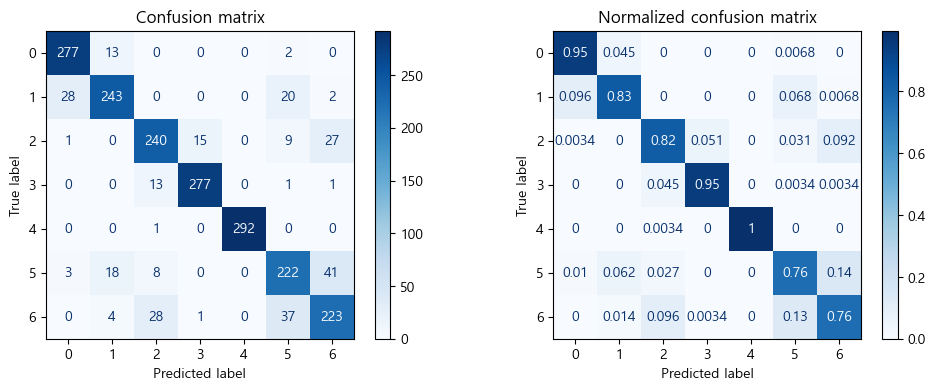

In [213]:
# 오차행렬
get_evaluation(y_test, prediction, gbc, X_test)

#### 📌 결과
- 이전 모델 보다 성능이 열세하므로 적합하지 않다고 판단됨.

### 💡 LightGBM

In [214]:
from lightgbm import LGBMClassifier

In [215]:
# 검증용 데이터 세트 분리
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# 검증용 데이터 세트 담기
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [216]:
# 파라미터 값 설정
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'max_depth': [10, 20],
    'min_samples_split': [30, 35, 40, 45, 50]
}

In [217]:
# 학습 및 교차 검증 모델 설정
g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [218]:
# 훈련
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 8187, number of used features: 15
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'max_depth': [10, 20],
                         'min_samples_split': [30, 35, 40, 45, 50],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [219]:
# 훈련 결과 출력
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.856113,11
1,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.852327,56
2,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.853915,36
3,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.856113,11
4,"{'learning_rate': 0.3, 'max_depth': 10, 'min_s...",0.852327,56
...,...,...,...
115,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.340784,120
116,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.354709,107
117,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.354709,107
118,"{'learning_rate': 1, 'max_depth': 20, 'min_sam...",0.354709,107


In [220]:
# 최적의 모델 담기
lgbm = g_lgbm.best_estimator_

In [221]:
# 예측
prediction = lgbm.predict(X_test)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


오차 행렬
[[275  16   0   0   0   1   0]
 [ 27 246   0   0   0  18   2]
 [  1   1 242  13   0  10  25]
 [  0   0  11 280   0   0   1]
 [  0   0   0   0 293   0   0]
 [  2  19   8   0   0 215  48]
 [  0   6  24   1   0  34 228]]
정확도: 0.8691, 정밀도: 0.8687, 재현율: 0.8691, F1: 0.8687
################################################################################
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


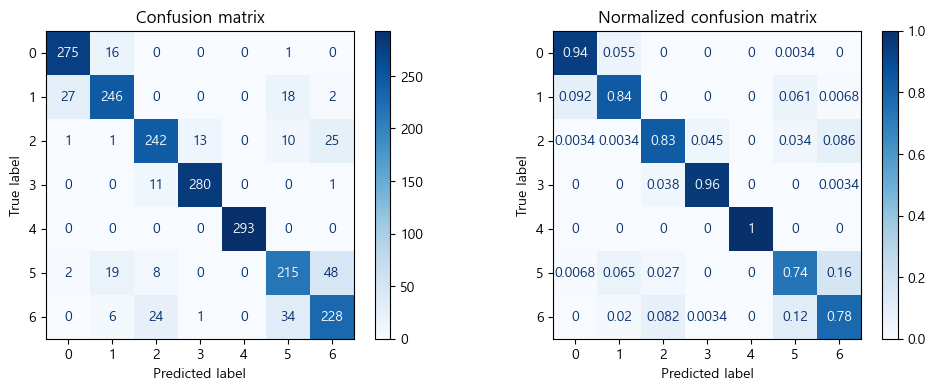

In [222]:
# 오차행렬
get_evaluation(y_test, prediction, lgbm, X_test)

#### 📌 결과
- 이전 모델 보다 성능이 열세하므로 적합하지 않다고 판단됨.

### Ⅴ. 결론

In [63]:
data = {
    'model': ['DTC', 'SVC', 'KNN', 'hard voting', 'soft voting', 'Random Forest(sta)', 'Boosting', 'GNB', 'LightGBM'],
    '정확도': [0.8456, 0.8422, 0.7074, 0.8407, 0.8598, 0.8754, 0.8696, 0.8666, 0.8691],
    '정밀도': [0.8450, 0.8425, 0.7013, 0.8382, 0.8587, 0.8744, 0.8686, 0.8664, 0.8687],
    '재현율': [0.8456, 0.8422, 0.7074, 0.8408, 0.8598, 0.8754, 0.8696, 0.8666, 0.8691],
    'F1': [0.8446, 0.8413, 0.7026, 0.8386, 0.8587, 0.8747, 0.8688, 0.8663, 0.8687]
}

results_df = pd.DataFrame(data)

In [64]:
results_df

,model,정확도,정밀도,재현율,F1
0,DTC,0.8456,0.8450,0.8456,0.8446
1,SVC,0.8422,0.8425,0.8422,0.8413
2,KNN,0.7074,0.7013,0.7074,0.7026
3,hard voting,0.8407,0.8382,0.8408,0.8386
4,soft voting,0.8598,0.8587,0.8598,0.8587
5,Random Forest(sta),0.8754,0.8744,0.8754,0.8747
6,Boosting,0.8696,0.8686,0.8696,0.8688
7,GNB,0.8666,0.8664,0.8666,0.8663
8,LightGBM,0.8691,0.8687,0.8691,0.8687


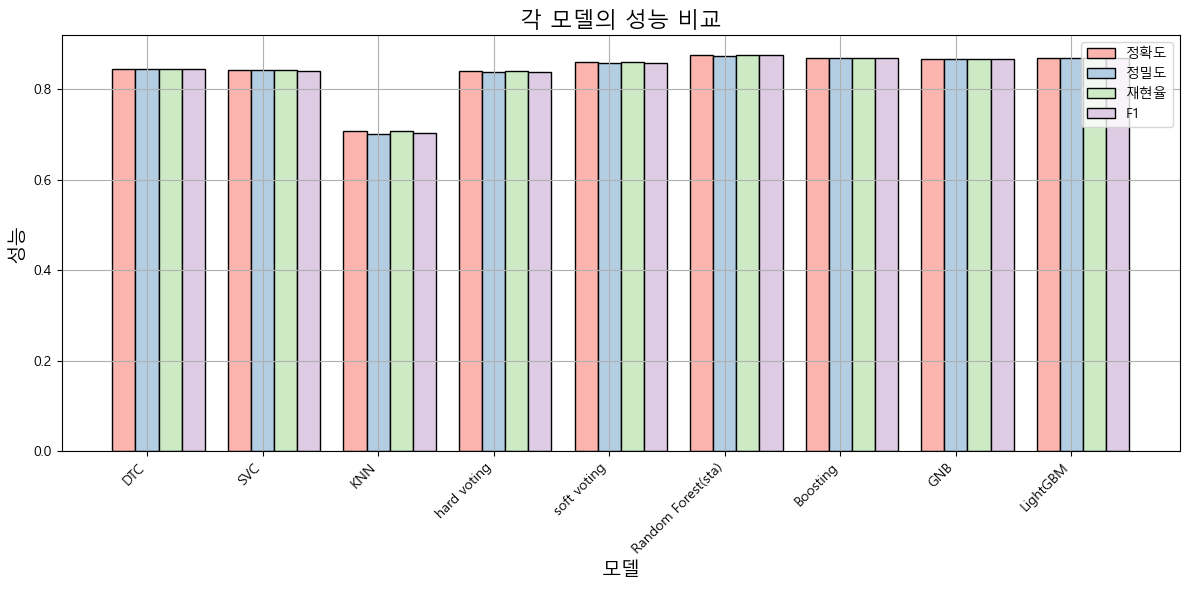

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = results_df['model']
accuracy = results_df['정확도']
precision = results_df['정밀도']
recall = results_df['재현율']
f1 = results_df['F1']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 📌 결론
StandardScaler로 전처리한 Random Forest의 모델의 수치가 가장 우세함에 따라 Random Forest을 사용하는 게 가장 좋다고 판단되며,  
정확도 약 0.8 이상의 수치로 보아 성능 좋은 모델임을 확인함.

### 🌟 2Cycle (독립 변수 간 상관관계에 따른 데이터 제거)

#### 📊 순열 중요도

In [67]:
from sklearn.inspection import permutation_importance

In [68]:
# 주어진 모델과 테스트 데이터에 대한 순열 중요도를 계산
importance = permutation_importance(g_rfc, X_test, y_test, n_repeats=30, random_state=124)
# 평균을 내림차순으로 정렬하여 각 피처의 중요도 순위를 반환
importance.importances_mean.argsort()[::-1]

array([14,  0,  4,  1,  2, 12,  8, 10, 11,  5,  3,  6,  9, 13,  7],
      dtype=int64)

In [69]:
# 피처, 타겟 데이터 분리
features, targets = enc_o_df.iloc[:, :-1], enc_o_df.iloc[:, -1]

Text(0.5, 1.0, 'Correlation')

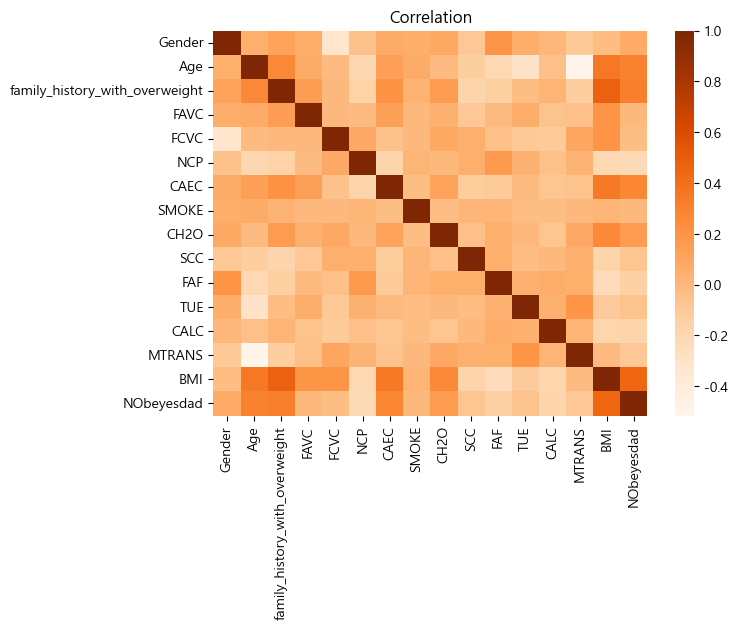

In [72]:
# 상관관계의 지수 확인
corr = enc_o_df.corr()

# 그래프 사이즈 조절
fig = plt.figure(figsize=(7, 5))

# 상관관계 히트맵으로 확인
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [73]:
# 모델의 각 피처별 중요도 확인
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

BMI: 0.5954
Gender: 0.1477
FCVC: 0.1099
Age: 0.046
family_history_with_overweight: 0.017
CALC: 0.0132
CH2O: 0.0104
FAF: 0.01
TUE: 0.0089
NCP: 0.0083
FAVC: 0.0081
CAEC: 0.0046
SCC: 0.0024
MTRANS: 0.0018
SMOKE: 0.0005


#### 📌 결과
- BMI가 가장 중요하다고 확인됨.
- 독립변수 간 관계가 긴밀하지만, 중요도는 낮은 피처인 'CAEC'를 제거하여 재학습하고자 한다.

#### 📊 피처 제거

In [74]:
co_o_df = enc_o_df.copy()

In [75]:
co_o_df = co_o_df.drop(labels='CAEC', axis=1)

Text(0.5, 1.0, 'Correlation')

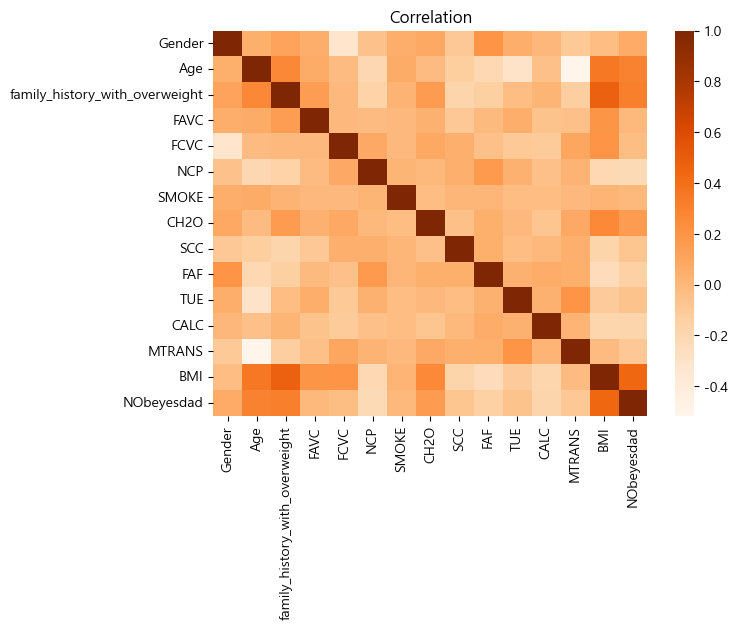

In [76]:
# 상관관계의 지수 확인
corr = co_o_df.corr()

# 그래프 사이즈 조절
fig = plt.figure(figsize=(7, 5))

# 상관관계 히트맵으로 확인
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

#### 📊 데이터 세트 분리

In [77]:
# 피처, 타겟 데이터 분리
features, targets = co_o_df.iloc[:, :-1], co_o_df.iloc[:, -1]

In [78]:
# 문제/정답 및 학습/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

#### 📊 조정

In [79]:
# 파라미터 값 설정
parameters = {
    'rfc__max_depth': [10, 20], 
    'rfc__min_samples_split': [30, 35, 40, 45, 50]
}

In [80]:
# 랜덤포레스트 분류기 담기
two_rfc = RandomForestClassifier(n_estimators=100)

In [81]:
# StandardScaler 사용
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', two_rfc)])
two_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

#### 📊 학습

In [82]:
#훈련
two_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20],
                         'rfc__min_samples_split': [30, 35, 40, 45, 50]})

In [83]:
result_df = pd.DataFrame(two_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.865764,6
1,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.865274,7
2,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.862709,10
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.866006,5
4,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.863077,9
5,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.867228,3
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.869060,1
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.866252,4
8,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.868328,2
9,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.864542,8


#### 📊 예측

In [84]:
# 최적의 모델 담기
two_rfc = two_rfc.best_estimator_
# 예측
prediction = two_rfc.predict(X_test)

#### 📊 평가

오차 행렬
[[279  13   0   0   0   0   0]
 [ 27 250   0   0   0  15   1]
 [  1   1 249  11   1  12  17]
 [  0   0  12 279   0   0   1]
 [  0   0   1   0 292   0   0]
 [  2  19   7   0   0 216  48]
 [  0   3  26   1   0  36 227]]
정확도: 0.8754, 정밀도: 0.8747, 재현율: 0.8754, F1: 0.8749
################################################################################


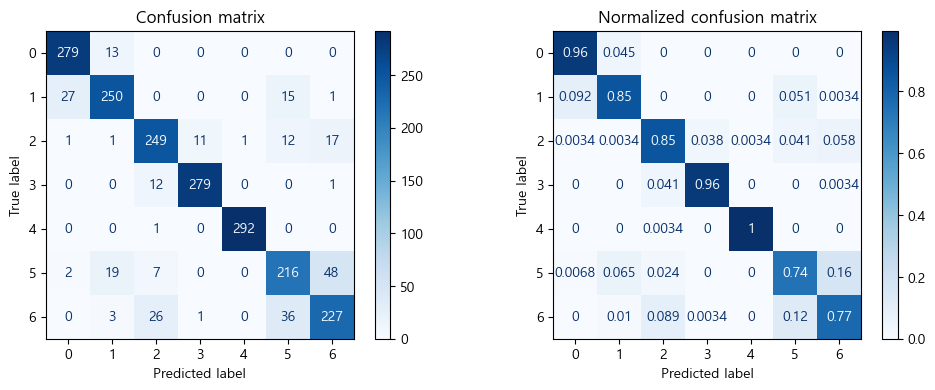

In [85]:
# 오차행렬
get_evaluation(y_test, prediction, two_rfc, X_test)

#### 📌 결과
- 독립 변수 간 상관관계가 긴밀하지만, 타겟의 중요도는 낮은 피처를 제거 후 학습하니 정확도와 재현율은 그대로 유지되었지만,  
  정밀도와 F1 점수가 상승한 것을 확인할 수 있음.

### 🌟 3Cycle (불균형 분포 데이터 제거)

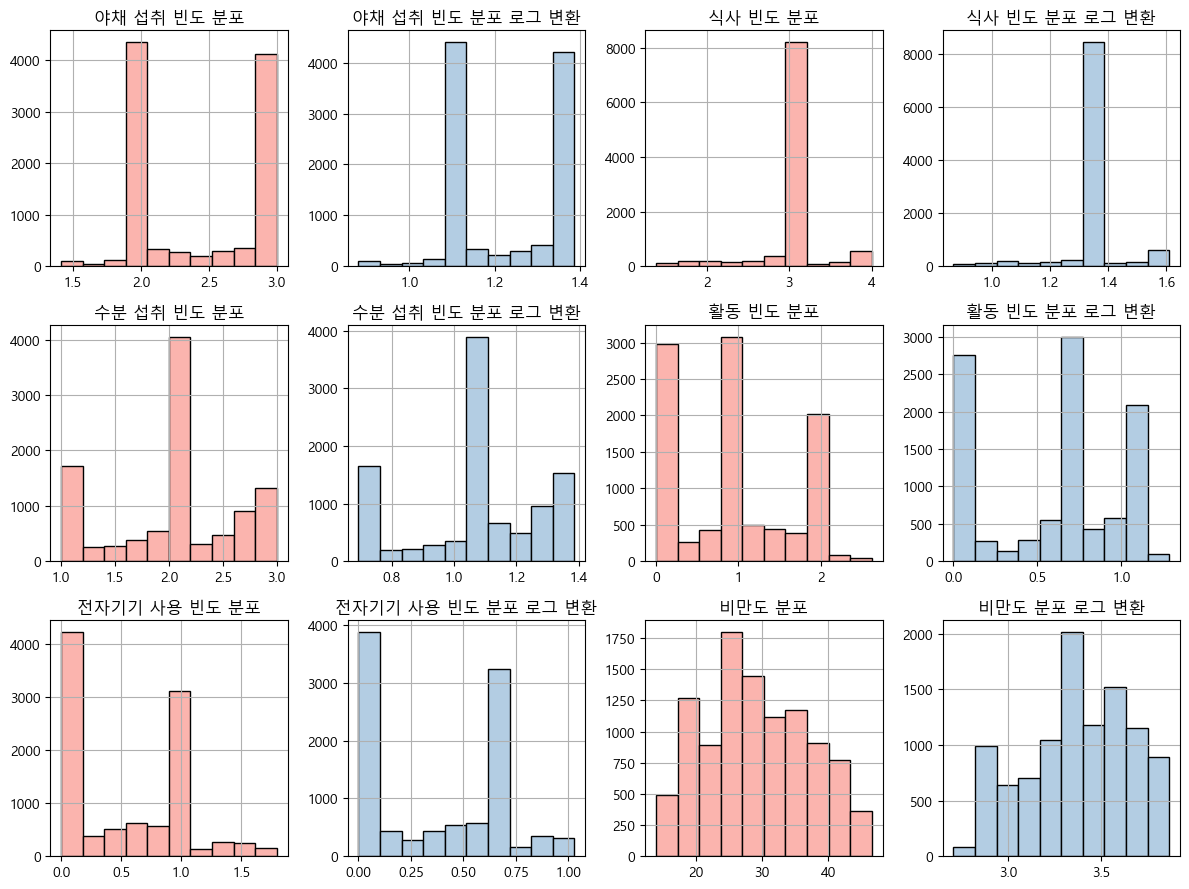

In [86]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

axes[0][0].hist(enc_o_df.FCVC, color=cmap(np.array([0])), edgecolor='black')
axes[0][0].grid(True)
axes[0][0].set_title('야채 섭취 빈도 분포')
axes[0][1].hist(np.log1p(enc_o_df.FCVC), color=cmap(np.array([1])), edgecolor='black')
axes[0][1].grid(True)
axes[0][1].set_title('야채 섭취 빈도 분포 로그 변환')
axes[0][2].hist(enc_o_df.NCP, color=cmap(np.array([0])), edgecolor='black')
axes[0][2].grid(True)
axes[0][2].set_title('식사 빈도 분포')
axes[0][3].hist(np.log1p(enc_o_df.NCP), color=cmap(np.array([1])), edgecolor='black')
axes[0][3].grid(True)
axes[0][3].set_title('식사 빈도 분포 로그 변환')

axes[1][0].hist(enc_o_df.CH2O, color=cmap(np.array([0])), edgecolor='black')
axes[1][0].grid(True)
axes[1][0].set_title('수분 섭취 빈도 분포')
axes[1][1].hist(np.log1p(enc_o_df.CH2O), color=cmap(np.array([1])), edgecolor='black')
axes[1][1].grid(True)
axes[1][1].set_title('수분 섭취 빈도 분포 로그 변환')
axes[1][2].hist(enc_o_df.FAF, color=cmap(np.array([0])), edgecolor='black')
axes[1][2].grid(True)
axes[1][2].set_title('활동 빈도 분포')
axes[1][3].hist(np.log1p(enc_o_df.FAF), color=cmap(np.array([1])), edgecolor='black')
axes[1][3].grid(True)
axes[1][3].set_title('활동 빈도 분포 로그 변환')

axes[2][0].hist(enc_o_df.TUE, color=cmap(np.array([0])), edgecolor='black')
axes[2][0].grid(True)
axes[2][0].set_title('전자기기 사용 빈도 분포')
axes[2][1].hist(np.log1p(enc_o_df.TUE), color=cmap(np.array([1])), edgecolor='black')
axes[2][1].grid(True)
axes[2][1].set_title('전자기기 사용 빈도 분포 로그 변환')
axes[2][2].hist(enc_o_df.BMI, color=cmap(np.array([0])), edgecolor='black')
axes[2][2].grid(True)
axes[2][2].set_title('비만도 분포')
axes[2][3].hist(np.log1p(enc_o_df.BMI), color=cmap(np.array([1])), edgecolor='black')
axes[2][3].grid(True)
axes[2][3].set_title('비만도 분포 로그 변환')
plt.tight_layout()
plt.show()

#### 📌 분석
- 분포가 불균형한 데이터 중 식사 빈도(NCP), 전자기기 사용 빈도(TUE)의 중요도가 낮게 나타남에 따라 해당 피처를 제거하고자 함.

#### 📊 피처 제거

In [89]:
thr_o_df = co_o_df.copy()

In [90]:
thr_o_df = thr_o_df.drop(labels=['NCP', 'TUE'], axis=1)

#### 📊 데이터 세트 분리

In [91]:
# 피처, 타겟 데이터 분리
features, targets = thr_o_df.iloc[:, :-1], thr_o_df.iloc[:, -1]

In [92]:
# 문제/정답 및 학습/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

#### 📊 조정

In [93]:
# 파라미터 값 설정
parameters = {
    'rfc__max_depth': [10, 20], 
    'rfc__min_samples_split': [30, 35, 40, 45, 50]
}

In [94]:
# 랜덤포레스트 분류기 담기
thr_rfc = RandomForestClassifier(n_estimators=100)

In [95]:
# StandardScaler 사용
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', thr_rfc)])
thr_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

#### 📊 훈련

In [96]:
#훈련
thr_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20],
                         'rfc__min_samples_split': [30, 35, 40, 45, 50]})

#### 📊 예측

In [97]:
# 최적의 모델 담기
thr_rfc = thr_rfc.best_estimator_
# 예측
prediction = thr_rfc.predict(X_test)

#### 📊 평가

오차 행렬
[[279  13   0   0   0   0   0]
 [ 27 250   0   0   0  14   2]
 [  1   1 246  11   1  13  19]
 [  0   0   9 282   0   1   0]
 [  0   0   1   0 292   0   0]
 [  2  19   7   0   0 215  49]
 [  0   3  26   0   0  40 224]]
정확도: 0.8735, 정밀도: 0.8727, 재현율: 0.8735, F1: 0.8729
################################################################################


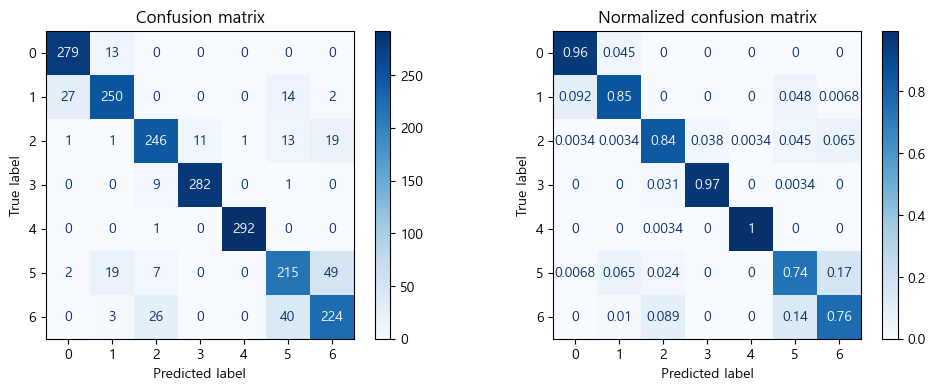

In [98]:
# 오차행렬
get_evaluation(y_test, prediction, thr_rfc, X_test)

### 🌟 결론

In [99]:
data = {
    'model': ['1Cycle', '2Cycle', '3Cycle'],
    '정확도': [0.8754, 0.8754, 0.8735],
    '정밀도': [0.8744, 0.8747, 0.8727],
    '재현율': [0.8754, 0.8754, 0.8735],
    'F1': [0.8747, 0.8749, 0.8729]
}

results_df = pd.DataFrame(data)

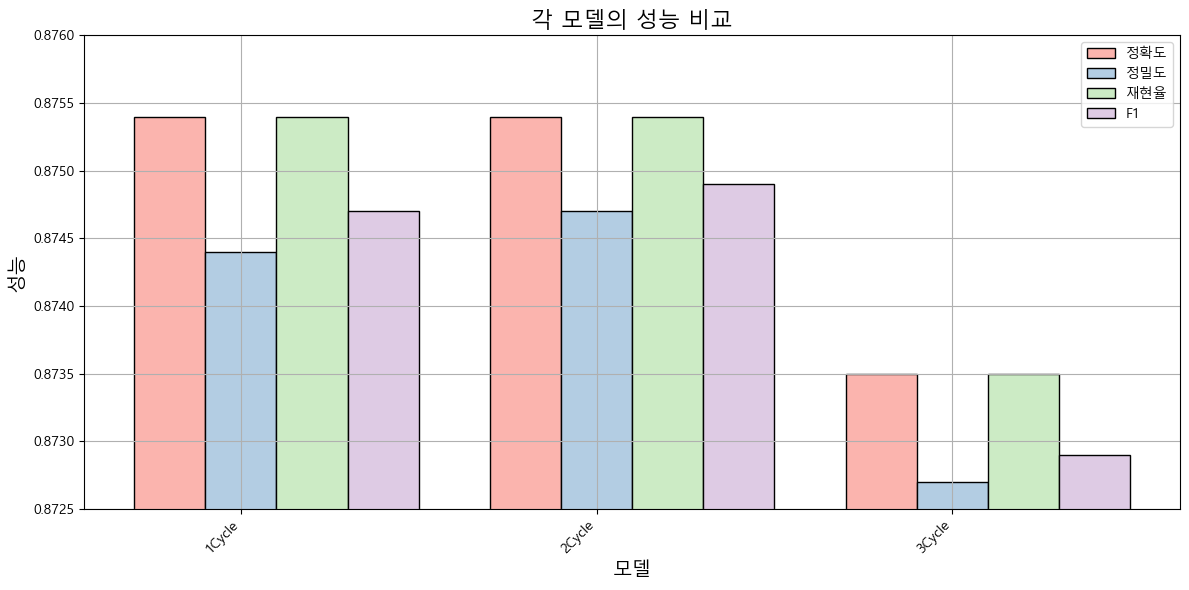

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = results_df['model']
accuracy = results_df['정확도']
precision = results_df['정밀도']
recall = results_df['재현율']
f1 = results_df['F1']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.8725, 0.876)

plt.tight_layout()
plt.show()

#### 📌 결과
- StandardScaler로 전처리한 Random Forest의 모델의 수치가 가장 우세함에 따라 Random Forest을 사용하는 게 가장 좋다고 판단되며,  
  정확도 약 0.8 이상의 수치로 보아 성능 좋은 모델임을 확인함.
- 독립 변수 간 상관관계가 긴밀하지만, 타겟의 중요도는 낮은 피처를 제거 후 학습하니 정확도와 재현율은 그대로 유지되었지만,  
  정밀도와 F1 점수가 상승한 것을 확인할 수 있음.
- 중요도가 낮고 불균형한 분포의 피처를 제거하여 학습한 경우에는 오히려 수치가 낮아지는 거을 확인함.

<br>

- 따라서, StandardScaler를 사용하고 특정 독립변수의 피처를 제거하여 학습시킨 Random Forest 모델이 가장 성능이 좋은 것으로 평가됨.